In [7]:
import pandas as pd

from datetime import datetime
import requests
import json
import matplotlib.pyplot as plt
import csv

In [8]:
import plotly.graph_objs as go
import plotly

In [9]:
import pandas_datareader as web

In [10]:
from alpha_vantage.timeseries import TimeSeries

In [11]:
with open('stock_market_analysis.csv','w',newline='',encoding='utf-8')as csvfile:
    fieldnames=['Timestamp','Open','High','Low','Close','Volume']
    
    thewriter=csv.DictWriter(csvfile,fieldnames=fieldnames)
    thewriter.writeheader()

    url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=TSLA&interval=5min&apikey=06MBTFCULR9VTJX9'
    r = requests.get(url)
    data = r.json()

    time_stamp=[]
    open_values=[]
    high_values=[]
    low_values=[]
    close_values=[]
    volume=[]

    for i in data.values(): 
        for j in i.keys():
            time_stamp.append(j)
        for k in i.values():
                if type(k)==dict:
                    open_values.append(k['1. open'])
                    high_values.append(k['2. high'])
                    low_values.append(k['3. low'])
                    close_values.append(k['4. close'])
                    volume.append(k['5. volume'])
        #for ts, op, hi, lo, cl, vol in zip(time_stamp, open_values, high_values, low_values, close_values, volume):
        #    thewriter.writerow({'Timestamp': ts, 'Open': op, 'High': hi, 'Low': lo, 'Close': cl, 'Volume': vol})

    thewriter.writerow({'Timestamp':time_stamp,'Open':open_values,'High':high_values,'Low':low_values,'Close':close_values,'Volume':volume})                 

   




In [30]:


import pandas as pd
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=AAPL&interval=1min&apikey=06MBTFCULR9VTJX9&outputsize=full'
r = requests.get(url)
data = r.json()

time_stamp=[]
open_values=[]
high_values=[]
low_values=[]
close_values=[]
volume=[]

for i in data.values(): 
    for j in i.keys():
        time_stamp.append(j)
    for k in i.values():
            if type(k)==dict:
                open_values.append(k['1. open'])
                high_values.append(k['2. high'])
                low_values.append(k['3. low'])
                close_values.append(k['4. close'])
                volume.append(k['5. volume'])
   

df=pd.DataFrame({'Timestamp':time_stamp[6:],
                 'Open':open_values,
                 'High':high_values,
                 'Low':low_values,
                 'Close':close_values,
                 'Volume':volume})

fig = go.Figure(data=[go.Candlestick(x=df['Timestamp'],
                                        open=df['Open'],
                                        high=df['High'],
                                         low=df['Low'],
                                         close=df['Close']
                                        )])
    #Export candlestick to HTML
plotly.offline.plot(fig,filename=(f'market.html' ))

   



'market.html'

In [25]:
df

,Timestamp,Open,High,Low,Close,Volume
0,2023-06-08 19:55:00,246.3500,246.7500,246.1600,246.6500,248816
1,2023-06-08 19:50:00,246.5000,246.5700,245.8800,246.3500,141768
2,2023-06-08 19:45:00,245.8300,246.9500,245.7800,246.5001,184629
3,2023-06-08 19:40:00,246.1700,246.1700,245.6100,245.7500,151162
4,2023-06-08 19:35:00,246.4000,246.4100,245.6900,246.1600,212258
...,...,...,...,...,...,...
3833,2023-05-11 04:20:00,169.5400,169.6000,169.5000,169.5800,7985
3834,2023-05-11 04:15:00,169.3500,169.5600,169.3500,169.5000,6215
3835,2023-05-11 04:10:00,169.2600,169.3900,169.2600,169.3600,6164
3836,2023-05-11 04:05:00,169.2000,169.2900,169.1400,169.2200,8330


In [2]:

def apikey():
    '''Read the Api Key from txt file'''
    f=open('apikey.txt','r+').read()
    return f

def stock_market_html(symbol,interval,apikey):
    '''Using the alphavatage API extracting the US Market historical data.Inside the param Pass the (Ticker,interval,apikey)  '''
    import pandas as pd
    import requests
    import plotly.graph_objs as go
    import plotly
    
    # Scrapping the data from the alphavantage database in JASON format
    url = (f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval={interval}&apikey={apikey}&outputsize=full')
    r = requests.get(url)
    data = r.json()

    time_stamp=[]
    open_values=[]
    high_values=[]
    low_values=[]
    close_values=[]
    volume=[]
    #Extracting the values from jason format using the nested for loop concepts and stored in the list above
    for i in data.values(): 
        for j in i.keys():
            time_stamp.append(j)
        for k in i.values():
                if type(k)==dict:
                    open_values.append(k['1. open'])
                    high_values.append(k['2. high'])
                    low_values.append(k['3. low'])
                    close_values.append(k['4. close'])
                    volume.append(k['5. volume'])

    # Using the pandas lib  converting each list to dataframe
    df=pd.DataFrame({'Timestamp':time_stamp[6:],
                     'Open':open_values,
                     'High':high_values,
                     'Low':low_values,
                     'Close':close_values,
                     'Volume':volume})
    
    # Used Plotly graph_obj to give visulation to the dataset
    fig = go.Figure(data=[go.Candlestick(x=df['Timestamp'],
                                        open=df['Open'],
                                        high=df['High'],
                                         low=df['Low'],
                                         close=df['Close']
                                        )])
    #Export candlestick to HTML format
    pt=plotly.offline.plot(fig,filename=(f'{symbol}.html' ))
    
    return pt



In [3]:
stock_market_html('META','1min',apikey)



'META.html'

In [2]:
def apikey():
    f=open('apikey.txt','r+').read()
    return f

def stock_market_intraday(symbol,interval,apikey):
    import pandas as pd
    import requests
    url = (f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval={interval}&apikey={apikey}&outputsize=full')
    r = requests.get(url)
    data = r.json()

    time_stamp=[]
    open_values=[]
    high_values=[]
    low_values=[]
    close_values=[]
    volume=[]

    for i in data.values(): 
        for j in i.keys():
            time_stamp.append(j)
        for k in i.values():
                if type(k)==dict:
                    open_values.append(k['1. open'])
                    high_values.append(k['2. high'])
                    low_values.append(k['3. low'])
                    close_values.append(k['4. close'])
                    volume.append(k['5. volume'])


    df=pd.DataFrame({'Timestamp':time_stamp[6:],
                     'Open':open_values,
                     'High':high_values,
                     'Low':low_values,
                     'Close':close_values,
                     'Volume':volume})
    
    df.to_csv(f'stock_{symbol}.csv')
    return df


In [114]:
stock_market_intraday('AHI','5min',apikey)

,Timestamp,Open,High,Low,Close,Volume
0,2023-06-08 19:55:00,0.6843,0.7091,0.6799,0.7036,9667
1,2023-06-08 19:50:00,0.6910,0.6910,0.6563,0.6843,3354
2,2023-06-08 19:45:00,0.6700,0.6900,0.6700,0.6900,4071
3,2023-06-08 19:40:00,0.6613,0.6716,0.6607,0.6710,8991
4,2023-06-08 19:35:00,0.6800,0.6900,0.6607,0.6607,1856
...,...,...,...,...,...,...
243,2023-05-12 11:30:00,0.3427,0.3427,0.3427,0.3427,396
244,2023-05-12 09:30:00,0.3200,0.3200,0.3200,0.3200,10001
245,2023-05-12 08:25:00,0.3450,0.3450,0.3450,0.3450,104
246,2023-05-12 08:05:00,0.3755,0.3755,0.3755,0.3755,281


In [66]:
import csv
import requests

url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=TSLA&interval=5min&apikey=06MBTFCULR9VTJX9'
r = requests.get(url)
data = r.json()

time_stamp = []
open_values = []
high_values = []
low_values = []
close_values = []
volume = []

for i in data["Time Series (5min)"].values():
    for j, k in i.items():
        if j == "1. open":
            open_values.append(k)
        elif j == "2. high":
            high_values.append(k)
        elif j == "3. low":
            low_values.append(k)
        elif j == "4. close":
            close_values.append(k)
        elif j == "5. volume":
            volume.append(k)
        else:
            time_stamp.append(j)

with open('stock_market_analysis.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume']
    thewriter = csv.DictWriter(csvfile, fieldnames=fieldnames)
    thewriter.writeheader()

    for ts, op, hi, lo, cl, vol in zip(time_stamp, open_values, high_values, low_values, close_values, volume):
        thewriter.writerow({'Timestamp': ts, 'Open': op, 'High': hi, 'Low': lo, 'Close': cl, 'Volume': vol})


In [8]:
pwd()

'C:\\Users\\vanus'

In [9]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=TSLA&interval=5min&apikey=06MBTFCULR9VTJX9'
r = requests.get(url)
data = r.json()

print(data)

{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume', '2. Symbol': 'TSLA', '3. Last Refreshed': '2023-06-08 19:55:00', '4. Interval': '5min', '5. Output Size': 'Compact', '6. Time Zone': 'US/Eastern'}, 'Time Series (5min)': {'2023-06-08 19:55:00': {'1. open': '246.3500', '2. high': '246.7500', '3. low': '246.1600', '4. close': '246.6500', '5. volume': '248816'}, '2023-06-08 19:50:00': {'1. open': '246.5000', '2. high': '246.5700', '3. low': '245.8800', '4. close': '246.3500', '5. volume': '141768'}, '2023-06-08 19:45:00': {'1. open': '245.8300', '2. high': '246.9500', '3. low': '245.7800', '4. close': '246.5001', '5. volume': '184629'}, '2023-06-08 19:40:00': {'1. open': '246.1700', '2. high': '246.1700', '3. low': '245.6100', '4. close': '245.7500', '5. volume': '151162'}, '2023-06-08 19:35:00': {'1. open': '246.4000', '2. high': '246.4100', '3. low': '245.6900', '4. close': '246.1600', '5. volume': '212258'}, '2023-06-08 19:30:00': {'1. open': '

In [10]:
data.keys()

dict_keys(['Meta Data', 'Time Series (5min)'])

In [87]:
f=open('apikey.txt','w')

In [88]:
f.write('06MBTFCULR9VTJX9')

16

In [89]:
f.close()

In [11]:
df=pd.DataFrame(data)

In [12]:
df['Time Series (5min)']

1. Information                                                       NaN
2. Symbol                                                            NaN
3. Last Refreshed                                                    NaN
4. Interval                                                          NaN
5. Output Size                                                       NaN
                                             ...                        
2023-06-08 12:00:00    {'1. open': '231.9399', '2. high': '232.4100',...
2023-06-08 11:55:00    {'1. open': '232.6435', '2. high': '233.2000',...
2023-06-08 11:50:00    {'1. open': '232.3208', '2. high': '232.9200',...
2023-06-08 11:45:00    {'1. open': '232.8700', '2. high': '232.9500',...
2023-06-08 11:40:00    {'1. open': '232.4000', '2. high': '233.0900',...
Name: Time Series (5min), Length: 106, dtype: object

In [13]:
df=pd.DataFrame(data).T
df.columns= df.iloc[1].index
df=df[1:]

print(df)

                   1. Information 2. Symbol 3. Last Refreshed 4. Interval  \
Time Series (5min)            NaN       NaN               NaN         NaN   

                   5. Output Size 6. Time Zone  \
Time Series (5min)            NaN          NaN   

                                                  2023-06-08 19:55:00  \
Time Series (5min)  {'1. open': '246.3500', '2. high': '246.7500',...   

                                                  2023-06-08 19:50:00  \
Time Series (5min)  {'1. open': '246.5000', '2. high': '246.5700',...   

                                                  2023-06-08 19:45:00  \
Time Series (5min)  {'1. open': '245.8300', '2. high': '246.9500',...   

                                                  2023-06-08 19:40:00  ...  \
Time Series (5min)  {'1. open': '246.1700', '2. high': '246.1700',...  ...   

                                                  2023-06-08 12:25:00  \
Time Series (5min)  {'1. open': '232.5800', '2. high': '232.7500',...   


In [14]:
data.info()

AttributeError: 'dict' object has no attribute 'info'

In [15]:
data.values()
 

dict_values([{'1. Information': 'Intraday (5min) open, high, low, close prices and volume', '2. Symbol': 'TSLA', '3. Last Refreshed': '2023-06-08 19:55:00', '4. Interval': '5min', '5. Output Size': 'Compact', '6. Time Zone': 'US/Eastern'}, {'2023-06-08 19:55:00': {'1. open': '246.3500', '2. high': '246.7500', '3. low': '246.1600', '4. close': '246.6500', '5. volume': '248816'}, '2023-06-08 19:50:00': {'1. open': '246.5000', '2. high': '246.5700', '3. low': '245.8800', '4. close': '246.3500', '5. volume': '141768'}, '2023-06-08 19:45:00': {'1. open': '245.8300', '2. high': '246.9500', '3. low': '245.7800', '4. close': '246.5001', '5. volume': '184629'}, '2023-06-08 19:40:00': {'1. open': '246.1700', '2. high': '246.1700', '3. low': '245.6100', '4. close': '245.7500', '5. volume': '151162'}, '2023-06-08 19:35:00': {'1. open': '246.4000', '2. high': '246.4100', '3. low': '245.6900', '4. close': '246.1600', '5. volume': '212258'}, '2023-06-08 19:30:00': {'1. open': '246.8500', '2. high': '

In [28]:
for i in data.values():
    print(i.keys())

dict_keys(['1. Information', '2. Symbol', '3. Last Refreshed', '4. Interval', '5. Output Size', '6. Time Zone'])
dict_keys(['2023-06-08 19:55:00', '2023-06-08 19:50:00', '2023-06-08 19:45:00', '2023-06-08 19:40:00', '2023-06-08 19:35:00', '2023-06-08 19:30:00', '2023-06-08 19:25:00', '2023-06-08 19:20:00', '2023-06-08 19:15:00', '2023-06-08 19:10:00', '2023-06-08 19:05:00', '2023-06-08 19:00:00', '2023-06-08 18:55:00', '2023-06-08 18:50:00', '2023-06-08 18:45:00', '2023-06-08 18:40:00', '2023-06-08 18:35:00', '2023-06-08 18:30:00', '2023-06-08 18:25:00', '2023-06-08 18:20:00', '2023-06-08 18:15:00', '2023-06-08 18:10:00', '2023-06-08 18:05:00', '2023-06-08 18:00:00', '2023-06-08 17:55:00', '2023-06-08 17:50:00', '2023-06-08 17:45:00', '2023-06-08 17:40:00', '2023-06-08 17:35:00', '2023-06-08 17:30:00', '2023-06-08 17:25:00', '2023-06-08 17:20:00', '2023-06-08 17:15:00', '2023-06-08 17:10:00', '2023-06-08 17:05:00', '2023-06-08 17:00:00', '2023-06-08 16:55:00', '2023-06-08 16:50:00', '2

In [71]:
#'2. high': '248.1800', '3. low': '246.5900', '4. close': '247.0000', '5. volume'
time_stamp=[]
open_values=[]
high_values=[]
low_values=[]
close_values=[]
volume=[]

for i in data.values(): 
    for j in i.keys():
        time_stamp.append(j)
    for k in i.values():
            if type(k)==dict:
                open_values.append(k['1. open'])
                high_values.append(k['2. high'])
                low_values.append(k['3. low'])
                close_values.append(k['4. close'])
                volume.append(k['5. volume'])
                
print(time_stamp,open_values,high_values,low_values,close_values,volume)                
        
    

['1. Information', '2. Symbol', '3. Last Refreshed', '4. Interval', '5. Output Size', '6. Time Zone', '2023-06-08 19:55:00', '2023-06-08 19:50:00', '2023-06-08 19:45:00', '2023-06-08 19:40:00', '2023-06-08 19:35:00', '2023-06-08 19:30:00', '2023-06-08 19:25:00', '2023-06-08 19:20:00', '2023-06-08 19:15:00', '2023-06-08 19:10:00', '2023-06-08 19:05:00', '2023-06-08 19:00:00', '2023-06-08 18:55:00', '2023-06-08 18:50:00', '2023-06-08 18:45:00', '2023-06-08 18:40:00', '2023-06-08 18:35:00', '2023-06-08 18:30:00', '2023-06-08 18:25:00', '2023-06-08 18:20:00', '2023-06-08 18:15:00', '2023-06-08 18:10:00', '2023-06-08 18:05:00', '2023-06-08 18:00:00', '2023-06-08 17:55:00', '2023-06-08 17:50:00', '2023-06-08 17:45:00', '2023-06-08 17:40:00', '2023-06-08 17:35:00', '2023-06-08 17:30:00', '2023-06-08 17:25:00', '2023-06-08 17:20:00', '2023-06-08 17:15:00', '2023-06-08 17:10:00', '2023-06-08 17:05:00', '2023-06-08 17:00:00', '2023-06-08 16:55:00', '2023-06-08 16:50:00', '2023-06-08 16:45:00', '

In [24]:

open_values = []
for i in data.values():
    for j in (i.values()):
        if type(j) == dict:
            print(j)

{'1. open': '246.3500', '2. high': '246.7500', '3. low': '246.1600', '4. close': '246.6500', '5. volume': '248816'}
{'1. open': '246.5000', '2. high': '246.5700', '3. low': '245.8800', '4. close': '246.3500', '5. volume': '141768'}
{'1. open': '245.8300', '2. high': '246.9500', '3. low': '245.7800', '4. close': '246.5001', '5. volume': '184629'}
{'1. open': '246.1700', '2. high': '246.1700', '3. low': '245.6100', '4. close': '245.7500', '5. volume': '151162'}
{'1. open': '246.4000', '2. high': '246.4100', '3. low': '245.6900', '4. close': '246.1600', '5. volume': '212258'}
{'1. open': '246.8500', '2. high': '247.0000', '3. low': '246.3800', '4. close': '246.3800', '5. volume': '118800'}
{'1. open': '247.2800', '2. high': '247.3000', '3. low': '246.5200', '4. close': '246.6700', '5. volume': '170224'}
{'1. open': '247.0000', '2. high': '247.4300', '3. low': '246.7000', '4. close': '247.1000', '5. volume': '205868'}
{'1. open': '247.7000', '2. high': '248.1800', '3. low': '246.5900', '4.

In [ ]:
open_values = []
for i in data.values():
    for j in (i.values()):
        if type(j) == dict:
            print(j.values())
            for k in j['1. open']:
                 open_values.append(k)

In [101]:
import pandas as pd
from datetime import datetime
from alpha_vantage.timeseries import TimeSeries

stock = "AAPL"
key = "06MBTFCULR9VTJX9"


ts = TimeSeries(key, output_format='pandas')

data, meta= ts.get_intraday(stock,interval='1min',outputsize='full')

meta


{'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
 '2. Symbol': 'AAPL',
 '3. Last Refreshed': '2023-06-08 19:59:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7080 entries, 2023-06-08 19:59:00 to 2023-05-26 04:01:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    7080 non-null   float64
 1   2. high    7080 non-null   float64
 2   3. low     7080 non-null   float64
 3   4. close   7080 non-null   float64
 4   5. volume  7080 non-null   float64
dtypes: float64(5)
memory usage: 331.9 KB


In [103]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2023-06-08 19:59:00,180.49,180.50,180.48,180.50,2928.0
2023-06-08 19:58:00,180.41,180.45,180.41,180.45,1594.0
2023-06-08 19:57:00,180.40,180.40,180.40,180.40,813.0
2023-06-08 19:56:00,180.45,180.45,180.41,180.41,625.0
2023-06-08 19:55:00,180.33,180.45,180.33,180.41,1698.0


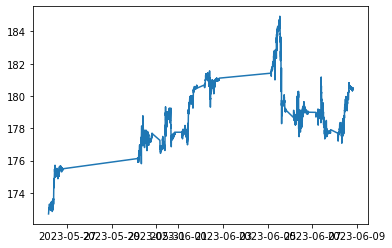

In [104]:
plt.plot(data['4. close'])

In [105]:
columns = ['open','high','low','close','volume']

data.columns = columns

In [106]:
data['TradeDate']=data.index.date
data['time']=data.index.time

In [107]:
data.loc['2023-06-08']

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2023-06-08 19:59:00,180.49,180.50,180.48,180.50,2928.0,2023-06-08,19:59:00
2023-06-08 19:58:00,180.41,180.45,180.41,180.45,1594.0,2023-06-08,19:58:00
2023-06-08 19:57:00,180.40,180.40,180.40,180.40,813.0,2023-06-08,19:57:00
2023-06-08 19:56:00,180.45,180.45,180.41,180.41,625.0,2023-06-08,19:56:00
2023-06-08 19:55:00,180.33,180.45,180.33,180.41,1698.0,2023-06-08,19:55:00
...,...,...,...,...,...,...,...
2023-06-08 04:06:00,177.27,177.30,177.27,177.30,530.0,2023-06-08,04:06:00
2023-06-08 04:05:00,177.23,177.23,177.23,177.23,342.0,2023-06-08,04:05:00
2023-06-08 04:04:00,177.30,177.36,177.30,177.32,1073.0,2023-06-08,04:04:00


In [110]:
market =data.between_time('9:30:00','16:00:00').copy()
market.sort_index(inplace=True)
market.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3519 entries, 2023-05-26 09:30:00 to 2023-06-08 16:00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       3519 non-null   float64
 1   high       3519 non-null   float64
 2   low        3519 non-null   float64
 3   close      3519 non-null   float64
 4   volume     3519 non-null   float64
 5   TradeDate  3519 non-null   object 
 6   time       3519 non-null   object 
dtypes: float64(5), object(2)
memory usage: 219.9+ KB


In [112]:
market.groupby('TradeDate').agg({'low':min,'high':max})

,low,high
TradeDate,,
2023-05-26,173.1100,175.770
2023-05-30,176.5700,178.990
2023-05-31,176.7600,179.350
2023-06-01,176.9306,180.130
2023-06-02,179.2600,181.780
2023-06-05,178.0350,184.951
2023-06-06,177.4300,180.120
2023-06-07,177.3200,181.210
2023-06-08,177.4600,180.840


In [113]:
market.loc[market.groupby('TradeDate')['low'].idxmin()]

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2023-05-26 09:30:00,173.320,173.600,173.1100,173.3200,778485.0,2023-05-26,09:30:00
2023-05-30 09:30:00,176.960,177.060,176.5700,176.9200,1839282.0,2023-05-30,09:30:00
2023-05-31 15:55:00,177.530,177.560,176.7600,177.3700,1533157.0,2023-05-31,15:55:00
2023-06-01 09:47:00,177.070,177.250,176.9306,177.0700,265231.0,2023-06-01,09:47:00
2023-06-02 10:25:00,179.535,179.535,179.2600,179.3150,308427.0,2023-06-02,10:25:00
2023-06-05 15:11:00,178.290,178.470,178.0350,178.3099,773558.0,2023-06-05,15:11:00
2023-06-06 10:02:00,177.560,177.620,177.4300,177.4842,233185.0,2023-06-06,10:02:00
2023-06-07 13:40:00,177.385,177.410,177.3200,177.3450,104166.0,2023-06-07,13:40:00
2023-06-08 10:03:00,177.730,177.735,177.4600,177.6600,240516.0,2023-06-08,10:03:00


In [114]:
market.loc[market.groupby('TradeDate')['high'].idxmax()]

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2023-05-26 11:01:00,175.7150,175.770,175.6750,175.7150,150851.0,2023-05-26,11:01:00
2023-05-30 09:40:00,178.6600,178.990,178.5250,178.7801,562871.0,2023-05-30,09:40:00
2023-05-31 10:06:00,179.2550,179.350,179.1715,179.3350,412357.0,2023-05-31,10:06:00
2023-06-01 16:00:00,180.0800,180.130,180.0100,180.0400,2285051.0,2023-06-01,16:00:00
2023-06-02 09:33:00,181.5401,181.780,181.4600,181.5100,431150.0,2023-06-02,09:33:00
2023-06-05 13:13:00,184.9100,184.951,184.8550,184.9440,226128.0,2023-06-05,13:13:00
2023-06-06 09:30:00,179.9650,180.120,178.5200,178.9800,1873053.0,2023-06-06,09:30:00
2023-06-07 09:51:00,181.0400,181.210,181.0200,181.1800,223446.0,2023-06-07,09:51:00
2023-06-08 15:50:00,180.8100,180.840,180.5900,180.6350,329918.0,2023-06-08,15:50:00


In [116]:
data

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2023-06-08 19:59:00,180.49,180.50,180.48,180.50,2928.0,2023-06-08,19:59:00
2023-06-08 19:58:00,180.41,180.45,180.41,180.45,1594.0,2023-06-08,19:58:00
2023-06-08 19:57:00,180.40,180.40,180.40,180.40,813.0,2023-06-08,19:57:00
2023-06-08 19:56:00,180.45,180.45,180.41,180.41,625.0,2023-06-08,19:56:00
2023-06-08 19:55:00,180.33,180.45,180.33,180.41,1698.0,2023-06-08,19:55:00
...,...,...,...,...,...,...,...
2023-05-26 04:23:00,173.09,173.09,173.09,173.09,208.0,2023-05-26,04:23:00
2023-05-26 04:20:00,172.98,172.98,172.98,172.98,559.0,2023-05-26,04:20:00
2023-05-26 04:09:00,172.80,172.80,172.80,172.80,176.0,2023-05-26,04:09:00


In [123]:
data.to_csv('stock_AAPL.csv')
    

In [130]:
import pandas as pd
from datetime import datetime
from alpha_vantage.timeseries import TimeSeries

stock = "WBD"
key = "06MBTFCULR9VTJX9"


ts = TimeSeries(key, output_format='pandas')

data, meta= ts.get_intraday(stock,interval='1min',outputsize='full')

meta

{'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
 '2. Symbol': 'WBD',
 '3. Last Refreshed': '2023-06-08 19:59:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [131]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2023-06-08 19:59:00,14.13,14.13,14.13,14.13,113.0
2023-06-08 19:57:00,14.04,14.13,14.04,14.13,600.0
2023-06-08 19:55:00,14.14,14.14,14.14,14.14,225.0
2023-06-08 19:41:00,14.15,14.15,14.15,14.15,100.0
2023-06-08 19:39:00,14.14,14.14,14.14,14.14,3477.0


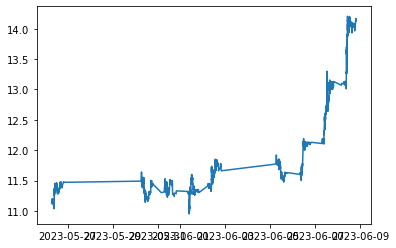

In [132]:
plt.plot(data['4. close'])

In [4]:
!pip install streamlit

Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.2 which is incompatible.



  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=0e0354c6aa55834ea80fd2bcc88f0af667f2d93aa2e459cc3b3d227ab4253504
  Stored in directory: c:\users\vanus\appdata\local\pip\cache\wheels\2d\f0\a8\1094fca7a7e5d0d12ff56e0c64675d72aa5cc81a5fc200e849
Successfully built validators


In [5]:
import streamlit as st

In [6]:
import plotly.express as px